In [ ]:
import sklearn
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving treino9EF_predSARESP_MAT_LP_2016a2018.csv to treino9EF_predSARESP_MAT_LP_2016a2018.csv


In [2]:
data = pd.read_csv("treino9EF_predSARESP_MAT_LP_2016a2018.csv", sep=',', na_values=" ") 

# "Dropando" SERIE

data.drop(['SERIE'],axis=1,inplace=True)

data

FileNotFoundError: ignored

In [ ]:
# Verificando valores inf e/ou valores NA

col_mask=data.isnull().any(axis=0)
row_mask=data.isnull().any(axis=1)

print (col_mask)
print (row_mask)

# Alterando valores NA com seus valores de moda (se houver)

#for column in data.columns:
#    data[column].fillna(data[column].mode()[0], inplace=True)

CD_MATRICULA_ALUNO    False
CICLO                 False
N_NIVEL_PROFIC        False
VL_NOTA_LP            False
VL_NOTA_MAT           False
FREQUENCIA_LP         False
FREQUENCIA_MAT        False
QTD_ABANDONO          False
VL_IDADE              False
CD_TURNO              False
AL_Grupo_do_IPVS      False
UNIDADE_PADRAO        False
DP_AAP_9EF            False
AAP_9EF               False
dtype: bool
0          False
1          False
2          False
3          False
4          False
           ...  
1458358    False
1458359    False
1458360    False
1458361    False
1458362    False
Length: 1458363, dtype: bool


In [ ]:
X = data.drop(columns = ['N_NIVEL_PROFIC']) # Demais atributos para classificação
y = data['N_NIVEL_PROFIC'] # Atributo alvo

#print(X)
#print(y)

In [ ]:
y.unique() # Verificando valores únicos para y (atributo alvo)

array([3, 2, 1, 4])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
scaler.fit(X_train)

train = scaler.transform(X_train)  
test = scaler.transform(X_test)

0.5757200700784783


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report de classificação MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     62015
           2       0.58      1.00      0.73    167922
           3       0.00      0.00      0.00     53169
           4       0.00      0.00      0.00      8567

    accuracy                           0.58    291673
   macro avg       0.14      0.25      0.18    291673
weighted avg       0.33      0.58      0.42    291673


Matriz de Con

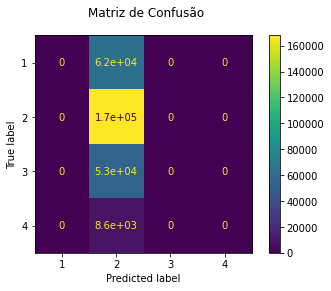

In [ ]:
# Modelo 1 - Utilização de Rede Neural (Multilayer Perceptron)

#from sklearn.neural_network import MLPClassifier  

#mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=5000)  
#mlp.fit(X_train, y_train.ravel())

from sklearn.neural_network import MLPClassifier
from sklearn import metrics

model_mlp = MLPClassifier() 

result = model_mlp.fit(X_train, y_train.values.ravel())
preds = model_mlp.predict(X_test)
metrics.accuracy_score(y_test, preds)
print(metrics.accuracy_score(y_test, preds))

from sklearn.metrics import classification_report, confusion_matrix  

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(y_test,preds)))
disp = metrics.plot_confusion_matrix(result, X_test, y_test)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

#print(confusion_matrix(y_test, pred))  
#print(classification_report(y_test, pred))
#print(accuracy_score(y_test, pred))

0.5844318809077289


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report de classificação RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=30, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

           1       0.57      0.01      0.03     62015
           2       0.59      0.98      0.73    167922
           3       0.49      0.11      0.18     53169
           4       0.00      0.00      0.00      8567

    accuracy                           0.58    291673
   macro avg       0.41      0.27      0.23    291673
weighted avg       0.55      0.58      0.46    291673


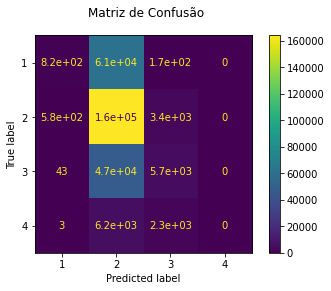

In [ ]:
# Modelo 2 - Utilização de RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30) # 95.775% de acurácia (RF + SMOTE - implementação detalhada)

result = model_rf.fit(X_train, y_train.values.ravel())
preds = model_rf.predict(X_test)
metrics.accuracy_score(y_test, preds)
print(metrics.accuracy_score(y_test, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(y_test,preds)))
disp = metrics.plot_confusion_matrix(result, X_test, y_test)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

0.5757200700784783


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report de classificação GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     62015
           2       0.58      1.00      0.73    167922
           3       0.00      0.00      0.00     53169
           4       0.00      0.00      0.00      8567

    accuracy                           0.58    291673
   macro avg       0.14      0.25      0.18    291673
weighted avg       0.33      0.58      0.42    291673


Matriz de Confusão:
[[     0  62015      0      0]
 [     0 167922      0      0]
 [     0  53169      0      0]
 [     0   8567      0      0]]


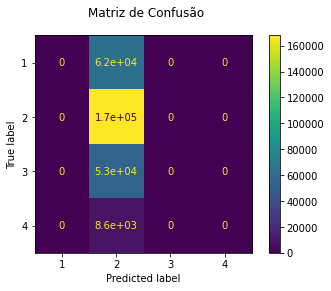

In [ ]:
# Modelo 3 - Algoritmo Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


model_nb = GaussianNB()

result = model_nb.fit(X_train, y_train.values.ravel())
preds = model_nb.predict(X_test)
metrics.accuracy_score(y_test, preds)
print(metrics.accuracy_score(y_test, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(y_test,preds)))
disp = metrics.plot_confusion_matrix(result, X_test, y_test)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

0.5757200700784783


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report de classificação LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     62015
           2       0.58      1.00      0.73    167922
           3       0.00      0.00      0.00     53169
           4       0.00      0.00      0.00      8567

    accuracy                           0.58    291673
   macro avg       0.14      0.25      0.18    291673
weighted avg       0.33      0.58      0.42    291673


Matriz de Confusão:
[[     0  62015      0      0]
 [     0 167922      0      0]
 [     0  53169      0      0]
 [     0   8567      0      0]]


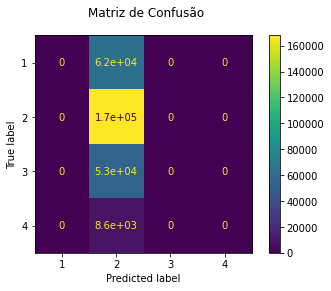

In [ ]:
# Modelo 4 - Regressão Logística

from sklearn.linear_model import LogisticRegression
from sklearn import metrics


model_logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 

result = model_logit.fit(X_train, y_train.values.ravel())
preds = model_logit.predict(X_test)
metrics.accuracy_score(y_test, preds)
print(metrics.accuracy_score(y_test, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(y_test,preds)))
disp = metrics.plot_confusion_matrix(result, X_test, y_test)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

0.5881723711142273


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report de classificação AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None):
              precision    recall  f1-score   support

           1       0.50      0.14      0.22     62015
           2       0.60      0.92      0.73    167922
           3       0.48      0.17      0.25     53169
           4       0.00      0.00      0.00      8567

    accuracy                           0.59    291673
   macro avg       0.40      0.31      0.30    291673
weighted avg       0.54      0.59      0.51    291673


Matriz de Confusão:
[[  8497  53196    322      0]
 [  7751 153886   6285      0]
 [   578  43420   9171      0]
 [    43   5167   3357      0]]


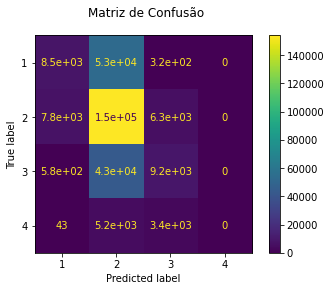

In [ ]:
# Modelo 5 - Classificador AdaBoost

from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics


model_ada = AdaBoostClassifier() 

result = model_ada.fit(X_train, y_train.values.ravel())
preds = model_ada.predict(X_test)
metrics.accuracy_score(y_test, preds)
print(metrics.accuracy_score(y_test, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(y_test,preds)))
disp = metrics.plot_confusion_matrix(result, X_test, y_test)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

0.589451200488218


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report de classificação XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1):
              precision    recall  f1-score   support

           1       0.53      0.10      0.16     62015
           2       0.60      0.94      0.73    167922
           3       0.48      0.17      0.25     53169
           4       0.00      0.00      0.00      8567

    accuracy                           0.59    291673
   macro avg       0.40      0.30      0.28    291673
weighted avg       0.55      0.59      0.50    291673


Matriz de Confusão:
[[  5943  55768    304      0]
 [  4938 157210   5

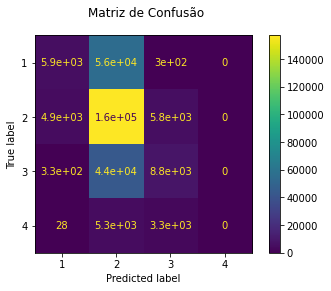

In [ ]:
# Modelo 6 - Algoritmo XGBoost

from xgboost import XGBClassifier
from sklearn import metrics


model_xgb = XGBClassifier()

result = model_xgb.fit(X_train, y_train.values.ravel())
preds = model_xgb.predict(X_test)
metrics.accuracy_score(y_test, preds)
print(metrics.accuracy_score(y_test, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(y_test,preds)))
disp = metrics.plot_confusion_matrix(result, X_test, y_test)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [ ]:
# Modelo 7 - Algoritmo ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics


model_etc = ExtraTreesClassifier()

result = model_etc.fit(X_train, y_train.values.ravel())
preds = model_etc.predict(X_test)
metrics.accuracy_score(y_test, preds)
print(metrics.accuracy_score(y_test, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(y_test,preds)))
disp = metrics.plot_confusion_matrix(result, X_test, y_test)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

0.5911654489788222
Report de classificação GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False):
              precision    recall  f1-score   support

           1       0.54      0.12      0.19     62015
           2       0.60      0.93      0.73    167922
           3       0.48      0.18      0.26     53169
           4       0.52      0.01      0.0

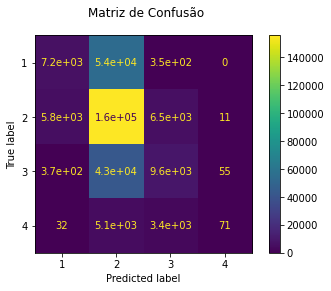

In [ ]:
# Modelo 8 - Algoritmo GradientBoosting

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics


model_gbc = GradientBoostingClassifier()

result = model_gbc.fit(X_train, y_train.values.ravel())
preds = model_gbc.predict(X_test)
metrics.accuracy_score(y_test, preds)
print(metrics.accuracy_score(y_test, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(y_test,preds)))
disp = metrics.plot_confusion_matrix(result, X_test, y_test)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

0.5370980515851655
Report de classificação DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'):
              precision    recall  f1-score   support

           1       0.44      0.47      0.46     62015
           2       0.64      0.64      0.64    167922
           3       0.37      0.36      0.36     53169
           4       0.22      0.21      0.21      8567

    accuracy                           0.54    291673
   macro avg       0.42      0.42      0.42    291673
weighted avg       0.54      0.54      0.54    291673


Matriz de Confusão:
[[ 29232  29948   2660    175]
 [ 33321 106709  25547   2345]
 [  3516  2

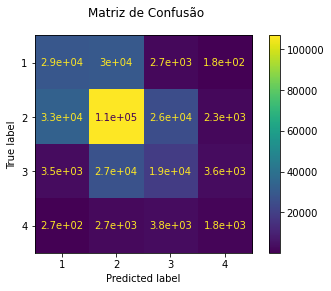

In [ ]:
# Teste 9 - Algoritmo Árvore de Decisão

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


model_dt = DecisionTreeClassifier()

result = model_dt.fit(X_train, y_train.values.ravel())
preds = model_dt.predict(X_test)
metrics.accuracy_score(y_test, preds)
print(metrics.accuracy_score(y_test, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(y_test,preds)))
disp = metrics.plot_confusion_matrix(result, X_test, y_test)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [ ]:
# Teste 10 - Algoritmo SVC (SVM)

from sklearn.svm import SVC
from sklearn import metrics


model_svm = SVC(kernel='linear') 

model_svm = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=False, random_state=None, shrinking=True,
               tol=0.001, verbose=False)

result = model_svm.fit(X_train, y_train.values.ravel())
preds = model_svm.predict(X_test)
metrics.accuracy_score(y_test, preds)
print(metrics.accuracy_score(y_test, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(y_test,preds)))
disp = metrics.plot_confusion_matrix(result, X_test, y_test)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [ ]:
# Teste 11 - Algoritmo KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


model_knn = KNeighborsClassifier() 

result = model_knn.fit(X_train, y_train.values.ravel())
preds = model_knn.predict(X_test)
metrics.accuracy_score(y_test, preds)
print(metrics.accuracy_score(y_test, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(y_test,preds)))
disp = metrics.plot_confusion_matrix(result, X_test, y_test)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [ ]:
# Teste 12 - Algoritmo LightGBM

In [ ]:
# Teste 13 - Algoritmo CatBoost Classifier

In [ ]:
# Falta - Melhorar a acurácia da predição nos dados de teste // Assim que melhorarmos o classificador, classificar dados 2019.
